<a href="https://colab.research.google.com/github/JacobDowns/CSCI-491-591/blob/main/lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy


*   NumPy is a useful package for accelerating array based, numerical operations in Python
*   Many complex loops or other operations can be translated to NumPy for efficiency
* Under the hood, NumPy is primarily written in C
* Allocating an array, for example, allocates a chunk of memory that can be referenced in C, Fortran, and Python
* Mathematical operations and linear algebra are also implemented in C or Fortran, taking advantage of optimized numerical libraries



## NDArrays

*   Numpy defines an n-dimensional array where every element in the array has the same data type
*  Examples: float32, float64, int32, int64, etc.
* It is common to use high-dimensional arrays in Numpy
* There are many typical ways to allocate new arrays in Numpy



## Defining Arrays

In [2]:
import numpy as np

In [ ]:
# 1d array
x1 = np.array([1,2,3,4,5])
x1

array([1, 2, 3, 4, 5])

In [ ]:
# 2d array (array of 1d arrays)
x2 = np.array([[1,2,3],[4,5,6]])
x2

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# 3d array  (Array of 2d arrays)
x3 = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
x3

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
# You can get the shape of an array with .shape
(x1.shape, x2.shape, x3.shape)

((5,), (2, 3), (2, 2, 3))

In [ ]:
# The number of elements is given by size
(x1.size, x2.size, x3.size)

(5, 6, 12)

In [ ]:
# The number of dimensions
(x1.ndim, x2.ndim, x3.ndim)

(1, 2, 3)

There are several short-hand ways of defining common arrays

In [ ]:
# 1d array of zeros
x4 = np.zeros(3)
x4

array([0., 0., 0.])

In [ ]:
# 2d array of zeros
x5 = np.zeros((3,3))
x5

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# 3d Array of zeros
x6 = np.zeros((3,3,3))
x6

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
# An array of ones
x7 = np.ones(3)
x7

array([1., 1., 1.])

In [ ]:
# Numpy will use a default type, dpending on how the array is created
x7.dtype

dtype('float64')

In [ ]:
# However you can define a specific type as follows
x8 = np.ones(3, dtype=np.int64)
x8.dtype

dtype('int64')

In [ ]:
# Or you can cast to a differnt type
x9 = x8.astype(np.float32)
x9

array([1., 1., 1.], dtype=float32)

In [ ]:
# Another common way to define an array is using arange, which just counts up from 0 by integers
x10 = np.arange(10)
x10

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# It has int64 type by default
x10.dtype

dtype('int64')

In [ ]:
# You can also define, the start, stop, and step explicitely. These don't have to be integers.
x11 = np.arange(1,10,0.5)
x11

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In [ ]:
# Another useful function is linspace, which produces evenly spaced numbers in an interval
x12 = np.linspace(0.,1.,10)
x12

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

## Reshaping

In [9]:
# You can reshape an array as long as the total number of elements checks out
# By default reshape uses row-major order. This means elements are read in a C-like
# index order, where the last axis index changes fastest.
x13 = np.arange(25)
x14 = x13.reshape((5,5))
x14

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [10]:
# You can change the order in memory. For exmaple, reshaping
# to Fortran-like order
x15 = x13.reshape((5,5), order='F')
x15

array([[ 0,  5, 10, 15, 20],
       [ 1,  6, 11, 16, 21],
       [ 2,  7, 12, 17, 22],
       [ 3,  8, 13, 18, 23],
       [ 4,  9, 14, 19, 24]])

In [11]:
# Arrays can also be flattened in numerous ways
x16 = np.arange(25).reshape((5,5))
x16.reshape((25,))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [ ]:
# Using flatten
x16.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

## Views Versus Copies

Note that some functions in numpy return views of the original array, while others return copies. For example, ravel and flatten are similar, but ravel returns a view of an array, whereas flatten returns a copy. Returning a view is faster and uses less memory. However, be aware that modifying it modifies the original array. This is important to keep in mind so you know what operations have side effects.

In [12]:
import numpy as np

a = np.array([[1, 2], [3, 4]])

r = a.ravel()
f = a.flatten()

r[0] = 99
f[1] = 88

print("Original:\n", a)
print("ravel:\n", r)
print("flatten:\n", f)

Original:
 [[99  2]
 [ 3  4]]
ravel:
 [99  2  3  4]
flatten:
 [ 1 88  3  4]


In [13]:
# You can check if an array is based on another array F
print(r.base is a)
print(f.base is a)

True
False


In [15]:
# Or if two arrays share memory
(np.shares_memory(a, r), np.shares_memory(a, f))

(True, False)

## Basic Indexing

In [17]:
# Indexing works how you would expect
x = np.arange(10)
print(x[0], x[1], x[9])

0 1 9


In [18]:
# You can use negative indexes to start indexing from the last element of an array
print(x[-1])

9


In [19]:
# For example, the second to last element...
print(x[-2])

8


In [21]:
# Things are similar for 2d arrays. The indices refer to rows then columns.
x = np.array([
    [1,2,3],
    [4,5,6]
])
print(x[0,0], x[0,1], x[1,0], x[1,-1])

1 2 4 6


In [ ]:
# What will this output?
x[-1, 1]

In [23]:
# Similarly for 3d arrays.
x = np.array([
    [[1,2,3],[4,5,6]],
    [[7,8,9],[10,11,12]]
])
print(x[0,0,0], x[0,0,1], x[1,0,0])

1 2 7


In [24]:
# You can think of index notation as dissecting the array into subarrays, and pulling elements
# (which could be numbers or subarrays) from them. For example,
# let's look at x[1]. It's a 2d array
x[1]

array([[ 7,  8,  9],
       [10, 11, 12]])

In [25]:
# The notation x[1][1] or x[1,1] pulls out the second row of x[1]
print(x[1][1], x[1,1])

[10 11 12] [10 11 12]


In [26]:
# The notation x[1][1][2] or x[1,1,2] pulls out the third element of the second row of x[1]
print(x[1][1][2], x[1,1,2])

12 12


## Fancy Indexing In Numpy

In [27]:
# Slicing let's let's you pull out portions of an array
y1 = np.arange(20)
y1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [41]:
# For example, this returns elements at indexes 5,6,7,8.
# Note that, for a slice i:j, the j-th element is not included
y1[5:9]

array([5, 6, 7, 8])

**From the Numpy guide:**
*The basic slice syntax is $i:j:k$ where $i$ is the starting index, $j$ is the stopping index, and $k$ is the step ($k \neq 0$)
). This selects the m elements (in the corresponding dimension) with index values $i, i + k, …, i + (m - 1) k$ where
 and $q$ and $r$ are the quotient and remainder obtained by dividing $j - i$ by $k: j - i = q k + r$, so that $i + (m - 1) k < j$.*


In [42]:
# You can take steps bigger than 1 when slicing
y1[5:9:2]

array([5, 7])

In [43]:
# There is special syntax for slicing from the beginning of an array to a given index
y1[:5]

array([0, 1, 2, 3, 4])

In [44]:
# Or for slicing from a given index to the end
y1[5:]

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [34]:
# You can get every n-th element of an array
y1[::2]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [35]:
# Or reverse an array with this notation. These work with multidemensional arrays too.
y1[::-1]

array([19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1,  0])

In [45]:
# Slicing can be done in any dimension
y2 = np.arange(25).reshape((5,5))
y2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [37]:
# The notation :, means get all elements in this dimension, so this gets the first and second
# elements of each row
y2[:,0:2]


array([[ 0,  1],
       [ 5,  6],
       [10, 11],
       [15, 16],
       [20, 21]])

In [ ]:
# What will this return?
y2[1:-1,1:-1]

## Exercise 1
Create a checkboard using an array of integers with 0 for black and 1 for white.

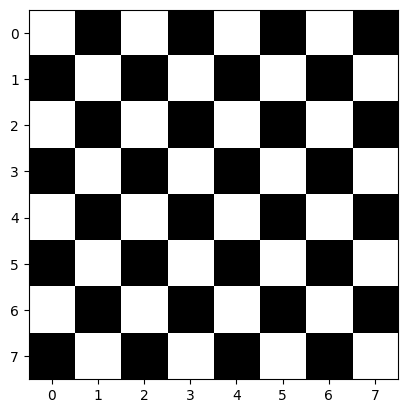

In [47]:
import matplotlib.pyplot as plt
board = np.zeros((8,8), dtype=int)
board[1::2,1::2] = 1
board[::2,0::2] = 1
plt.imshow(board, cmap='gray')


## Dimensional Indexing

There are some tools to facilitate the easy matching of array shapes with expressions and in assignments.

In [48]:
# 3d array
y3 = np.arange(125).reshape((5,5,5))
y3

array([[[  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9],
        [ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24]],

       [[ 25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34],
        [ 35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44],
        [ 45,  46,  47,  48,  49]],

       [[ 50,  51,  52,  53,  54],
        [ 55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64],
        [ 65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74]],

       [[ 75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84],
        [ 85,  86,  87,  88,  89],
        [ 90,  91,  92,  93,  94],
        [ 95,  96,  97,  98,  99]],

       [[100, 101, 102, 103, 104],
        [105, 106, 107, 108, 109],
        [110, 111, 112, 113, 114],
        [115, 116, 117, 118, 119],
        [120, 121, 122, 123, 124]]])

In [51]:
# The notation [..., ]. expands to the number of : objects needed for the selection tuple
# to index all dimensions. In most cases, this means that the length of the expanded
# selection tuple is x.ndim. There may only be a single ellipsis present.
print(y3[...,0])
print(y3[:,:,0])

[[  0   5  10  15  20]
 [ 25  30  35  40  45]
 [ 50  55  60  65  70]
 [ 75  80  85  90  95]
 [100 105 110 115 120]]
[[  0   5  10  15  20]
 [ 25  30  35  40  45]
 [ 50  55  60  65  70]
 [ 75  80  85  90  95]
 [100 105 110 115 120]]


In [53]:
# What will this return?
y3[1,...,1]

array([26, 31, 36, 41, 46])

In [ ]:
# Singleton dimensions can be added anywhere with this special notation
# We'll see why this can be useful later when we discuss broadcasting
y3[:,None,:,:]

array([[[[  0,   1,   2,   3,   4],
         [  5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14],
         [ 15,  16,  17,  18,  19],
         [ 20,  21,  22,  23,  24]]],


       [[[ 25,  26,  27,  28,  29],
         [ 30,  31,  32,  33,  34],
         [ 35,  36,  37,  38,  39],
         [ 40,  41,  42,  43,  44],
         [ 45,  46,  47,  48,  49]]],


       [[[ 50,  51,  52,  53,  54],
         [ 55,  56,  57,  58,  59],
         [ 60,  61,  62,  63,  64],
         [ 65,  66,  67,  68,  69],
         [ 70,  71,  72,  73,  74]]],


       [[[ 75,  76,  77,  78,  79],
         [ 80,  81,  82,  83,  84],
         [ 85,  86,  87,  88,  89],
         [ 90,  91,  92,  93,  94],
         [ 95,  96,  97,  98,  99]]],


       [[[100, 101, 102, 103, 104],
         [105, 106, 107, 108, 109],
         [110, 111, 112, 113, 114],
         [115, 116, 117, 118, 119],
         [120, 121, 122, 123, 124]]]])

In [ ]:
y3[:,None,:,:].shape

(5, 1, 5, 5)

In [ ]:
# This is also equivalent to
y3[:,np.newaxis,:,:]

array([[[[  0,   1,   2,   3,   4],
         [  5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14],
         [ 15,  16,  17,  18,  19],
         [ 20,  21,  22,  23,  24]]],


       [[[ 25,  26,  27,  28,  29],
         [ 30,  31,  32,  33,  34],
         [ 35,  36,  37,  38,  39],
         [ 40,  41,  42,  43,  44],
         [ 45,  46,  47,  48,  49]]],


       [[[ 50,  51,  52,  53,  54],
         [ 55,  56,  57,  58,  59],
         [ 60,  61,  62,  63,  64],
         [ 65,  66,  67,  68,  69],
         [ 70,  71,  72,  73,  74]]],


       [[[ 75,  76,  77,  78,  79],
         [ 80,  81,  82,  83,  84],
         [ 85,  86,  87,  88,  89],
         [ 90,  91,  92,  93,  94],
         [ 95,  96,  97,  98,  99]]],


       [[[100, 101, 102, 103, 104],
         [105, 106, 107, 108, 109],
         [110, 111, 112, 113, 114],
         [115, 116, 117, 118, 119],
         [120, 121, 122, 123, 124]]]])

## Advanced Indexing

**From the Numpy Guide:** *Advanced indexing is triggered when the selection object, obj, is a non-tuple sequence object, an ndarray (of data type integer or bool), or a tuple with at least one sequence object or ndarray (of data type integer or bool). There are two types of advanced indexing: integer and Boolean.*

Note that advanced indexing returns copies of the data rather than views.

In [56]:
# Arrays can be indexed by other arrays of integers
z0 = np.arange(10)
indexes = np.array([9,3,1,4])
z0[indexes]

array([9, 3, 1, 4])

In [58]:
# You can also index using plain Python lists
z0[[9,3,1,4]]

array([9, 3, 1, 4])

In [54]:
# For 2d arrays you can pass in two arrays of integers
z1 = np.arange(100).reshape((10,10))
indexes0 = np.array([9,3,1,4])
indexes1 = np.array([1,2,3,4])
z1[indexes0,indexes1]

array([91, 32, 13, 44])

In [59]:
# It's also common to use boolean indexing
indexes = np.array([True, False, True, False, True, False, True, False, True, False])
z0[indexes]

array([0, 2, 4, 6, 8])

In [61]:
# Boolean indexing is often used with comparison operators
# This identifies the elements greater than 4
indexes = z0 > 4
indexes

array([False, False, False, False, False,  True,  True,  True,  True,
        True])

In [62]:
# This pulls out those elements into an array
z0[indexes]

array([5, 6, 7, 8, 9])

In [63]:
# Doing this for a higher dimensional array will return a flattened array
indexes = z1 > 10
z1[indexes]

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
       96, 97, 98, 99])

In [64]:
# You can also assign values to a set of indices
z3 = np.arange(10)
z3[[0,5,9]] = 0
z3

array([0, 1, 2, 3, 4, 0, 6, 7, 8, 0])

In [75]:
# What will this return?
X = np.zeros((5,5))
X[np.arange(5), np.arange(5)] = 1.
X

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
# Is this valid? What will this return?
X = np.zeros((5,5))
X[np.arange(5), :] = np.arange(5)
X

In [ ]:
# The equivalent loop
X = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    X[i,j] = j
X

## Splitting, Merging, and Building Arrays

In [77]:
# Arrays can be concatenated, or combined on an existing axis
# That means the size in that axis increases
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.concatenate((a,b))
c

array([1, 2, 3, 4, 5, 6])

In [78]:
print(a.shape, b.shape, c.shape)

(3,) (3,) (6,)


In [ ]:
# Higher dimensional arrays can be concatenated too. By default this is along the first axis
# so if you have an n x k and a j x k, you'd get a (n+j)xk output
a = np.array([
    [1,2,3],
    [4,5,6]
])
b = np.array([
    [7,8,9],
    [10,11,12]
])
np.concatenate((a,b))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
# This, in turn, will concatenate along the columns dimension, so if you have an nxk and a nxj array, you get
# an nx(k+j) output
np.concatenate((a,b), axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [ ]:
# You can also join arrays along a new axis using stack
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
d = np.stack((a,b,c))
d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
# Stacking can also be done for different axes
a = np.array([
    [1,2,3],
    [4,5,6]
])
b = np.array([
    [7,8,9],
    [10,11,12]
])
c = np.stack((a,b), axis=2)
c

array([[[ 1,  7],
        [ 2,  8],
        [ 3,  9]],

       [[ 4, 10],
        [ 5, 11],
        [ 6, 12]]])

In [ ]:
c.shape

(2, 3, 2)

In [5]:
# hsplit operates on 2d arrays, splitting them into a given number of equally sized sub-arrays
a = np.array([[1, 2, 3],
              [4, 5, 6]])

np.hsplit(a, 3)

[array([[1],
        [4]]),
 array([[2],
        [5]]),
 array([[3],
        [6]])]

In [6]:
# Vsplit is similar, but splits along rows instead of columns.
np.vsplit(a, 2)

[array([[1, 2, 3]]), array([[4, 5, 6]])]

## Operations on arrays
So far we've seen how to build, index, and manipulate arrays, but no we need to do something useful with them. Many array operations can be performed element-wise.